Cleaning data

# **Group 8**

---


Niranjan Chaudhari  2020B5A30929P

Rahul James     2020A2PS1334P


Aditya Agrawal  2020B5A42010P

In [2]:
#Loading Data from csv file and replacing missing values by means of of the respective feature/column
import pandas as pd

data = pd.read_csv('/content/AirQualityUCI.csv')

data.replace(-200, pd.NA, inplace=True)

column_means = data.drop(['Date', 'Time'], axis=1).mean()

data.fillna(column_means, inplace=True)

data.to_csv('/content/Cleaned_AirQualityUCI.csv', index=False)


In [3]:
# Download the CSV file
from google.colab import files

files.download('Cleaned_AirQualityUCI.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1. **Regression** for one of the numerical attributes. Use logistic regression, random forests, extra random trees, and AdaBoost for regression tasks and compute the Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) for each model

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

data = pd.read_csv('Cleaned_AirQualityUCI.csv')

data['Date'] = pd.to_datetime(data['Date'], format='%m-%d-%Y')
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S')

data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Hour'] = data['Time'].dt.hour
data['Minute'] = data['Time'].dt.minute

X = data[['Year', 'Month', 'Day', 'Hour', 'Minute', 'CO(GT)', 'PT08.S1(CO)',
          'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)',
          'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'RH', 'AH']]
y = data['T']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Extra Trees": ExtraTreesRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{name}:")
    print(f"  RMSE: {rmse}")
    print(f"  MAE: {mae}")


Linear Regression:
  RMSE: 2.217401216762758
  MAE: 1.6470724417069211
Random Forest:
  RMSE: 0.23331355273607157
  MAE: 0.1308682253003256
Extra Trees:
  RMSE: 0.2839902631783132
  MAE: 0.16090478625586832
AdaBoost:
  RMSE: 2.057387980974128
  MAE: 1.6110687519656657


Adding categorical value

In [5]:
# Defining the conditions for new 'Feels Like' column, and defining values for each condition
import pandas as pd

data = pd.read_csv('Cleaned_AirQualityUCI.csv')

conditions = [
    (data['T'] > 25),
    (data['T'] <= 25)
]

values = ['HOT', 'COLD']

data['Feels Like'] = pd.Series(np.select(conditions, values))

data.to_csv('Categorical_AirQualityUCI.csv', index=False)


In [6]:
# Download the CSV file
from google.colab import files

files.download('Categorical_AirQualityUCI.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2. **Classification** using the labels given. Use Naive Bayes, KNN, SVM and Decision Trees. Compare the Precision, Recall and F1-score for all these approaches.

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

data = pd.read_csv('Categorical_AirQualityUCI.csv')

data['Date'] = pd.to_datetime(data['Date'], format='%m-%d-%Y')
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S')

data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Hour'] = data['Time'].dt.hour
data['Minute'] = data['Time'].dt.minute

X = data[['Year', 'Month', 'Day', 'Hour', 'Minute', 'CO(GT)', 'PT08.S1(CO)',
          'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)',
          'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'RH', 'AH','T']]
y = data['Feels Like']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

naive_bayes = GaussianNB()
knn = KNeighborsClassifier()
svm = SVC()
decision_tree = DecisionTreeClassifier()

naive_bayes.fit(X_train, y_train)
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

nb_pred = naive_bayes.predict(X_test)
knn_pred = knn.predict(X_test)
svm_pred = svm.predict(X_test)
dt_pred = decision_tree.predict(X_test)

nb_precision = precision_score(y_test, nb_pred, average='weighted')
nb_recall = recall_score(y_test, nb_pred, average='weighted')
nb_f1 = f1_score(y_test, nb_pred, average='weighted')

knn_precision = precision_score(y_test, knn_pred, average='weighted')
knn_recall = recall_score(y_test, knn_pred, average='weighted')
knn_f1 = f1_score(y_test, knn_pred, average='weighted')

svm_precision = precision_score(y_test, svm_pred, average='weighted')
svm_recall = recall_score(y_test, svm_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_pred, average='weighted')

dt_precision = precision_score(y_test, dt_pred, average='weighted')
dt_recall = recall_score(y_test, dt_pred, average='weighted')
dt_f1 = f1_score(y_test, dt_pred, average='weighted')

print("Naive Bayes - Precision:", nb_precision, "Recall:", nb_recall, "F1-score:", nb_f1)
print("KNN - Precision:", knn_precision, "Recall:", knn_recall, "F1-score:", knn_f1)
print("SVM - Precision:", svm_precision, "Recall:", svm_recall, "F1-score:", svm_f1)
print("Decision Tree - Precision:", dt_precision, "Recall:", dt_recall, "F1-score:", dt_f1)


Naive Bayes - Precision: 0.9105174154460934 Recall: 0.8867521367521367 F1-score: 0.8919602406992142
KNN - Precision: 0.8951579108456619 Recall: 0.8979700854700855 F1-score: 0.8950655838501012
SVM - Precision: 0.8627301999697833 Recall: 0.8659188034188035 F1-score: 0.8551524480397789
Decision Tree - Precision: 1.0 Recall: 1.0 F1-score: 1.0


3. **Clustering** using all the attributes. Apply K-means (choose appropriate k), EM-Clustering and k-medoids. Compute SSE for each clustering output.


In [9]:
# Choosing number of clusters k = 3 for the clustering algorithms
!pip install scikit-learn-extra
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn_extra.cluster import KMedoids
import numpy as np

data = pd.read_csv('Categorical_AirQualityUCI.csv')

features = data.drop(['Date', 'Time', 'Feels Like'], axis=1)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

sse_kmeans = []
sse_em = []
sse_kmedoids = []

k = 3

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_features)
sse_kmeans.append(kmeans.inertia_)

em = GaussianMixture(n_components=k, random_state=42)
em.fit(scaled_features)
sse_em.append(-em.score(scaled_features))

kmedoids = KMedoids(n_clusters=k, random_state=42)
kmedoids.fit(scaled_features)
sse_kmedoids.append(sum(min(np.linalg.norm(scaled_features - cluster_center, axis=1)) for cluster_center in kmedoids.cluster_centers_))

print("K-means SSE for k=2:", sse_kmeans)
print("EM-Clustering SSE for k=2:", sse_em)
print("K-medoids SSE for k=2:", sse_kmedoids)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.2 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-means SSE for k=2: [68041.8454069978]
EM-Clustering SSE for k=2: [2.175294174697565]
K-medoids SSE for k=2: [0.0]


/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


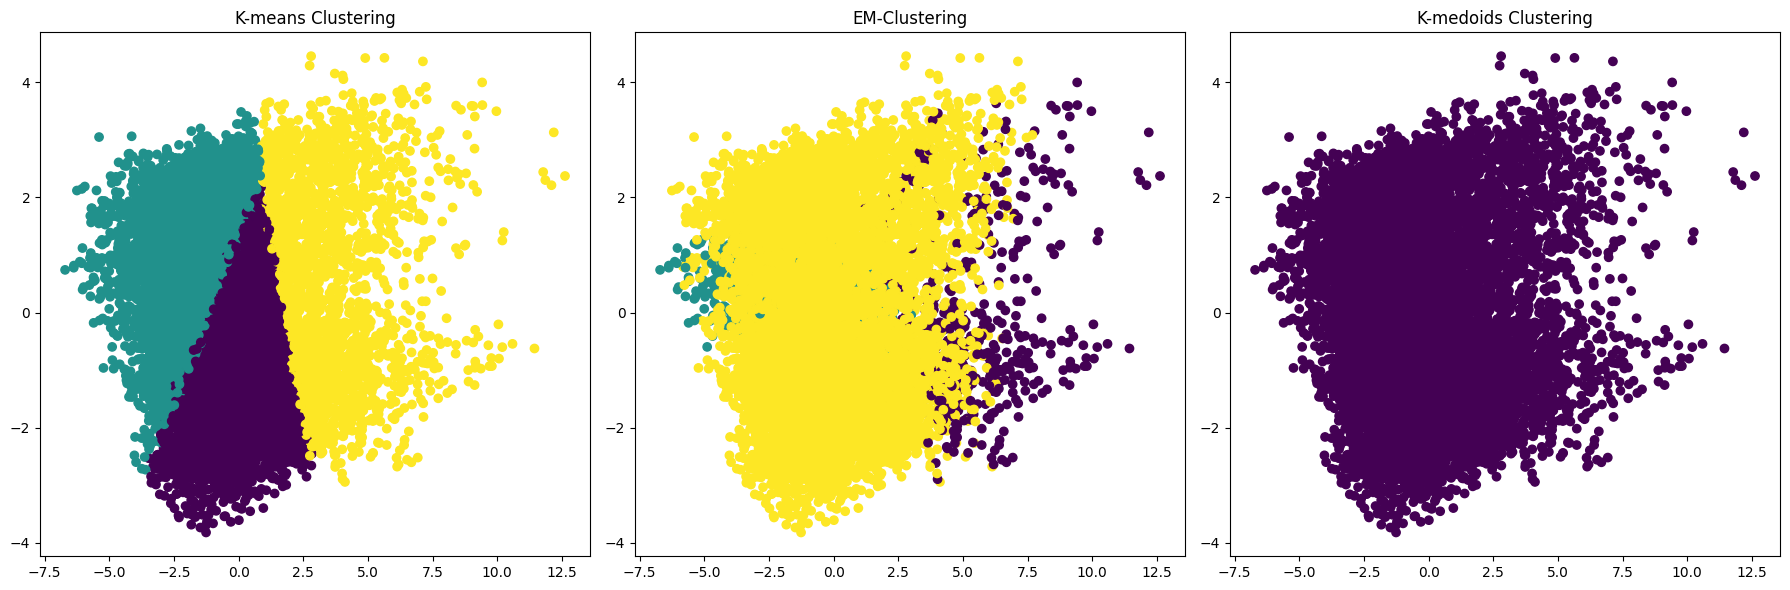

In [10]:
# Visualizing the output clustering of each of the algorithms
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
scaled_features_2d = pca.fit_transform(scaled_features)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].scatter(scaled_features_2d[:, 0], scaled_features_2d[:, 1], c=kmeans.labels_, cmap='viridis')
axs[0].set_title('K-means Clustering')

axs[1].scatter(scaled_features_2d[:, 0], scaled_features_2d[:, 1], c=em.predict(scaled_features), cmap='viridis')
axs[1].set_title('EM-Clustering')

axs[2].scatter(scaled_features_2d[:, 0], scaled_features_2d[:, 1], c=kmedoids.labels_, cmap='viridis')
axs[2].set_title('K-medoids Clustering')

plt.tight_layout()
plt.show()
